In [2]:
!pip install geopandas shapely folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.8 MB/s eta 0:00:00


In [3]:
# Requirements
import geopandas as gpd
import pandas as pd
import shapely.geometry
import folium

In [4]:
#Read and format Shape Files
labota_shp = gpd.read_file("/content/drive/MyDrive/Diversa/LABOTA_SHP/BARRIO_LA_BOTAt.shp")
labota_shp.crs = {'proj': 'utm',
           'zone': 17,
           'south': True,
           'datum': 'WGS84',
           'units': 'm',
           'no_defs': True}
labota_shp = labota_shp.to_crs('epsg:4326') # lat lon format
toctiuco_shp = gpd.read_file("/content/drive/MyDrive/Diversa/TOCTIUCO_SHP/TOCTIUCO_SECCENSAL2.shp")
toctiuco_shp.crs = {'proj': 'utm',
           'zone': 17,
           'south': True,
           'datum': 'WGS84',
           'units': 'm',
           'no_defs': True}
toctiuco_shp = toctiuco_shp.to_crs('epsg:4326')

In [5]:
labota_shp.dtypes

DPA_SECTOR      object
DPA_VALOR        int64
DPA_ANIO        object
DPA_ZONA        object
FUENTE          object
Shape_Leng     float64
Shape_Le_1     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [6]:
labota_shp.head()

,DPA_SECTOR,DPA_VALOR,DPA_ANIO,DPA_ZONA,FUENTE,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,170150045002,0,2014,170150045,ORTOFOTO,1092.191619,1092.191619,28854.221024,"POLYGON ((-78.46189 -0.11394, -78.46220 -0.114..."
1,170150044002,0,2014,170150044,ORTOFOTO,604.115955,604.115955,13887.534058,"POLYGON ((-78.46040 -0.11548, -78.46040 -0.115..."
2,170150044008,0,2014,170150044,ORTOFOTO,605.847872,605.847872,16119.056499,"POLYGON ((-78.46135 -0.11574, -78.46099 -0.115..."
3,170150044003,0,2014,170150044,ORTOFOTO,545.958219,545.958219,15077.523357,"POLYGON ((-78.45890 -0.11550, -78.45854 -0.115..."
4,170150044007,0,2014,170150044,ORTOFOTO,560.386084,560.386084,13348.408028,"POLYGON ((-78.45886 -0.11631, -78.45917 -0.116..."


In [7]:
#Read files 
cols = ['DPA_SECTOR', 'POB- MASCULINA',	'POB- FEMENINA',	'POB- TOTAL',	'ÁREA -KM2',	'DENSIDAD POB', 
        'AGRICULTURA', 'INDUSTRIAS', 'COMERCIO',	'TRANSPORTE',	'INFORMACIÓN',	'ACTIVIDAD-4',
        'ENSEÑANZA',	'ARTES',	'ACTIVIDAD-6', 'AGUA RED PUB',	'AGUA POR RED PUB',	'SERV HIG',	'LUZ',	
        'ELIMINACIÓN BASURA',	'VIVIENDAS',	'SERV BAS',	'TOTAL VIVIENDAS',	'INTERNET',	'HOGARES NO HAC',	'HOGARES  HAC',	'TOTAL HOGARES']
labota_df = pd.read_csv('/content/drive/MyDrive/Diversa/Censo Bota.csv', delimiter=',', usecols = cols, decimal=',', dtype={'DPA_SECTOR': object})
toctiuco_df = pd.read_csv('/content/drive/MyDrive/Diversa/Censo Toctiuco.csv', delimiter=',', usecols = cols, decimal=',', dtype={'DPA_SECTOR': object})

In [12]:
LaBota = labota_shp.merge(labota_df, on='DPA_SECTOR')
Toctiuco = toctiuco_shp.merge(toctiuco_df, on='DPA_SECTOR')

<AxesSubplot:>

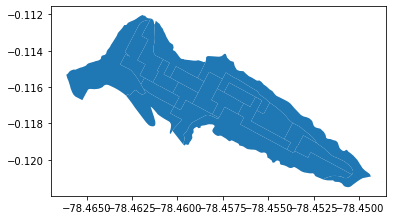

In [18]:
LaBota.plot()

In [15]:
LaBota.head()

,DPA_SECTOR,DPA_VALOR,DPA_ANIO,DPA_ZONA,FUENTE,Shape_Leng,Shape_Le_1,Shape_Area,geometry,POB- MASCULINA,...,SERV HIG,LUZ,ELIMINACIÓN BASURA,VIVIENDAS,SERV BAS,TOTAL VIVIENDAS,INTERNET,HOGARES NO HAC,HOGARES HAC,TOTAL HOGARES
0,170150045002,0,2014,170150045,ORTOFOTO,1092.191619,1092.191619,28854.221024,"POLYGON ((-78.46189 -0.11394, -78.46220 -0.114...",256.0,...,147.0,150.0,149.0,146.0,97.33,150.0,22.0,135.0,17.0,152.0
1,170150044002,0,2014,170150044,ORTOFOTO,604.115955,604.115955,13887.534058,"POLYGON ((-78.46040 -0.11548, -78.46040 -0.115...",114.0,...,69.0,69.0,69.0,69.0,100.00,69.0,11.0,61.0,8.0,69.0
2,170150044008,0,2014,170150044,ORTOFOTO,605.847872,605.847872,16119.056499,"POLYGON ((-78.46135 -0.11574, -78.46099 -0.115...",143.0,...,76.0,76.0,76.0,76.0,100.00,76.0,7.0,73.0,7.0,80.0
3,170150044003,0,2014,170150044,ORTOFOTO,545.958219,545.958219,15077.523357,"POLYGON ((-78.45890 -0.11550, -78.45854 -0.115...",139.0,...,82.0,82.0,82.0,82.0,100.00,82.0,8.0,73.0,9.0,82.0
4,170150044007,0,2014,170150044,ORTOFOTO,560.386084,560.386084,13348.408028,"POLYGON ((-78.45886 -0.11631, -78.45917 -0.116...",165.0,...,98.0,99.0,99.0,95.0,95.96,99.0,7.0,88.0,12.0,100.0


<AxesSubplot:>

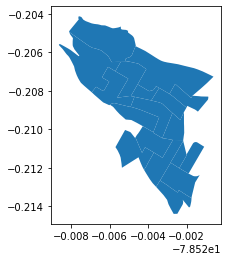

In [17]:
Toctiuco.plot()

In [16]:
Toctiuco.head()

,DPA_SECTOR,DPA_VALOR,DPA_ANIO,DPA_ZONA,FUENTE,Shape_Leng,Shape_Le_1,Shape_Area,geometry,POB- MASCULINA,...,SERV HIG,LUZ,ELIMINACIÓN BASURA,VIVIENDAS,SERV BAS,TOTAL VIVIENDAS,INTERNET,HOGARES NO HAC,HOGARES HAC,TOTAL HOGARES
0,170150182004,0,2014,170150182,ORTOFOTO,1416.550193,1416.550193,65504.869157,"POLYGON ((-78.52095 -0.20760, -78.52125 -0.207...",291.0,...,139.0,141.0,141.0,137.0,96.48,142.0,27.0,121.0,24.0,145.0
1,170150182007,0,2014,170150182,ORTOFOTO,954.024039,954.024039,26647.397484,"POLYGON ((-78.52533 -0.20788, -78.52561 -0.208...",249.0,...,134.0,138.0,138.0,133.0,96.38,138.0,18.0,108.0,30.0,138.0
2,170150182008,0,2014,170150182,ORTOFOTO,1376.360507,1376.360507,50240.289023,"POLYGON ((-78.52611 -0.20617, -78.52605 -0.206...",233.0,...,125.0,132.0,127.0,121.0,91.67,132.0,22.0,115.0,19.0,134.0
3,170150183002,0,2014,170150183,ORTOFOTO,696.538703,696.538703,19429.349518,"POLYGON ((-78.52492 -0.20884, -78.52491 -0.208...",182.0,...,85.0,84.0,86.0,81.0,94.19,86.0,11.0,72.0,22.0,94.0
4,170150182006,0,2014,170150182,ORTOFOTO,692.465695,692.465695,20220.247579,"POLYGON ((-78.52455 -0.20767, -78.52490 -0.208...",195.0,...,101.0,102.0,102.0,101.0,99.02,102.0,19.0,90.0,16.0,106.0
